DataSet: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [4]:
import torch
import pandas as pd
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
data = pd.read_csv("BostonHousing.csv")
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
# Separate column 'chas', because it is a binary dummy variable
# We do not care about this for now!!!
chas = data.pop("chas")
X_chas = torch.tensor(chas)

# Separate 'medv', since it is the result we would like to achive
data['medv'] = pd.cut(x=data['medv'], bins=np.linspace(data.medv.min()-0.001, data.medv.max()+0.001, num=11), labels=np.arange(10))
Y = torch.tensor(data.pop("medv"), dtype=torch.float)

data

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [4]:
# Convert continous data to categorical
data['crim'] = pd.cut(x=data['crim'], bins=np.linspace(data.crim.min()-0.001, data.crim.max()+0.001, num=11), labels=np.arange(10))
data['zn'] = pd.cut(x=data['zn'], bins=np.linspace(data.zn.min()-0.001, data.zn.max()+0.001, num=11), labels=np.arange(10))
data['indus'] = pd.cut(x=data['indus'], bins=np.linspace(data.indus.min()-0.001, data.indus.max()+0.001, num=11), labels=np.arange(10))
data['nox'] = pd.cut(x=data['nox'], bins=np.linspace(data.nox.min()-0.001, data.nox.max()+0.001, num=11), labels=np.arange(10))
data['rm'] = pd.cut(x=data['rm'], bins=np.linspace(data.rm.min()-0.001, data.rm.max()+0.001, num=11), labels=np.arange(10))
data['age'] = pd.cut(x=data['age'], bins=np.linspace(data.age.min()-0.001, data.age.max()+0.001, num=11), labels=np.arange(10))
data['dis'] = pd.cut(x=data['dis'], bins=np.linspace(data.dis.min()-0.001, data.dis.max()+0.001, num=11), labels=np.arange(10))
data['rad'] = pd.cut(x=data['rad'], bins=np.linspace(data.rad.min()-0.001, data.rad.max()+0.001, num=11), labels=np.arange(10))
data['tax'] = pd.cut(x=data['tax'], bins=np.linspace(data.tax.min()-0.001, data.tax.max()+0.001, num=11), labels=np.arange(10))
data['ptratio'] = pd.cut(x=data['ptratio'], bins=np.linspace(data.ptratio.min()-0.001, data.ptratio.max()+0.001, num=11), labels=np.arange(10))
data['b'] = pd.cut(x=data['b'], bins=np.linspace(data.b.min()-0.001, data.b.max()+0.001, num=11), labels=np.arange(10))
data['lstat'] = pd.cut(x=data['lstat'], bins=np.linspace(data.lstat.min()-0.001, data.lstat.max()+0.001, num=11), labels=np.arange(10))

In [5]:
# Shuffle data rows: https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
data = data.sample(frac=1).reset_index(drop=True)

In [6]:
# Build dataset
X = torch.tensor(data[data.columns[:]].values.astype(int))

X[:1]

tensor([[0, 2, 5, 1, 5, 7, 2, 1, 1, 5, 9, 2]])

In [7]:
# Create a tensor for the input one_hot vectors - But we do not need it now!!
'''inp = torch.tensor([])

for r in X:
    inner = torch.zeros((X.shape[1], 10))
    i = 0
    for e in r:
        inner[i, e] = 1.0
        i+=1
    inp = torch.cat((inner.view(1, X.shape[1], 10), inp))

X = inp
print(X.shape)
X[0]'''

'inp = torch.tensor([])\n\nfor r in X:\n    inner = torch.zeros((X.shape[1], 10))\n    i = 0\n    for e in r:\n        inner[i, e] = 1.0\n        i+=1\n    inp = torch.cat((inner.view(1, X.shape[1], 10), inp))\n\nX = inp\nprint(X.shape)\nX[0]'

In [8]:
# Create a tensor for the outpur one_hot vectors - But we do not need it now!!
'''inp = torch.tensor([])

for r in Y:
    inner = torch.zeros((1, 10))
    inner[0, r] = 1.0
    inp = torch.cat((inner, inp))

Y = inp
Y[0]'''

'inp = torch.tensor([])\n\nfor r in Y:\n    inner = torch.zeros((1, 10))\n    inner[0, r] = 1.0\n    inp = torch.cat((inner, inp))\n\nY = inp\nY[0]'

In [9]:
# Partition dataset
n1 = int(0.8*len(data))
n2 = int(0.9*len(data))

Xtr, Ytr = X[:n1], Y[:n1]
Xdev, Ydev = X[n1:n2], Y[n1:n2]
Xte, Yte = X[n2:], Y[n2:]

print(Xtr[0])
Xtr.shape, Ytr.shape

tensor([0, 2, 5, 1, 5, 7, 2, 1, 1, 5, 9, 2])


(torch.Size([404, 12]), torch.Size([404]))

In [10]:
# Layers
# ----------------------------------------------------------------------------------------------------------------------------

class Embedding:
    
    def __init__(self, num_embeddings, embedding_dim):
        self.weights = torch.randn((num_embeddings, embedding_dim))
        # init.xavier_uniform_(self.weights)  # Xavier initialization

        
    def __call__(self, X):
        # Xi = torch.tensor([p for x in X for p in (x == 1).nonzero(as_tuple=True)[0]]).view(1,-1)
        self.out = self.weights[X]
        return self.out
        
    def parameters(self):
        return [self.weights]
    
# ----------------------------------------------------------------------------------------------------------------------------

class Linear:
    
    def __init__(self, fan_in, fan_out, bias=False):
        self.weight = torch.randn((fan_in, fan_out))
        self.bias = torch.zeros(fan_out) if bias else None
        
    def __call__(self, x):
        self.out = x @ self.weight
        if self.bias is not None:
            self.out += self.bias
        return self.out
        
    def parameters(self):
        return [self.weight] + ([] if self.bias is None else self.bias)

# ----------------------------------------------------------------------------------------------------------------------------

class Transpose:
        
    def __call__(self, x):
        self.out = x.view(x.shape[1], -1)
        return self.out
        
    def parameters(self):
        return []
        
# ----------------------------------------------------------------------------------------------------------------------------

class Flatten:
        
    def __call__(self, emb):
        self.out = emb.view(emb.shape[0], -1)
        return self.out        
        
    def parameters(self):
        return []
        
# ----------------------------------------------------------------------------------------------------------------------------

# https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html#batchnorm1d
class BatchNorm1d:
    
    def __init__(self, dim, eps=1e-5, momentum=0.1):
        self.eps = eps
        self.momentum = momentum
        self.training = True
        # Parameters which trained with backpropagation:
        self.gamma = torch.ones(dim)
        self.beta = torch.zeros(dim)
        # Buffers which trained with running 'momentum' update
        self.running_mean = torch.zeros(dim)
        self.running_var = torch.ones(dim)
        
    def __call__(self, x):
        # Calculate the forward pass based on the paper: https://arxiv.org/abs/1502.03167
        if self.training: # if we would evaluate we dont want to train the network
            # instead of x.mean(0, ...), which only average elements over the first dim, we need to handle when the input tensor is not 2D, rather higher dim
            if x.ndim == 2:
                dim = 0
            elif x.ndim == 3:
                dim = (0,1)
            xmean = x.mean(dim, keepdim=True) 
            xvar = x.var(dim, keepdim=True) # batch variance
        else:
            xmean = self.running_mean
            xvar = self.running_var
        xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
        self.out = self.gamma * xhat + self.beta
        # update the buffers
        if self.training:
            # Important to use ._no_grad() here to not build the computational graph for the 'running_*' parameters 
            with torch.no_grad():
                self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * xmean
                self.running_var = (1 - self.momentum) * self.running_var + self.momentum * xvar
        return self.out
    
    def parameters(self):
        return [self.gamma, self.beta]
        
# ----------------------------------------------------------------------------------------------------------------------------

class Tanh:
        
    def __call__(self, x):
        self.out = torch.tanh(x)
        return self.out
        
    def parameters(self):
        return []
        
# ----------------------------------------------------------------------------------------------------------------------------

class Sequential:
    
    def __init__(self, layers):
        self.layers = layers
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        self.out = x
        return self.out
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

1. Embedding:  torch.Size([12, 10])
tensor([-1.1538, -1.0943,  1.9232,  0.5357, -0.5516, -1.3869, -1.9735,  0.7343,
         0.9332,  2.6237])
2. Linear layer:  torch.Size([12, 100])
4. Tanh:  torch.Size([12, 100])
5. Linear layer:  torch.Size([12, 10])
7. Tanh:  torch.Size([12, 10]) tensor([[ 1.0000,  1.0000, -0.9966, -0.9997,  1.0000, -1.0000,  1.0000, -0.9788,
         -1.0000, -1.0000]])
8a. Linear layer:  torch.Size([12, 1])
8b. Transpose layer:  torch.Size([1, 12])
8. Output layer:  torch.Size([1, 10])
tensor([[-15.1764,  13.9177,   6.5276,   4.6813,  -8.1515,   1.6693,   3.9969,
          -6.1278,   1.3321,   4.9443]])
10. Loss:  22.070085525512695


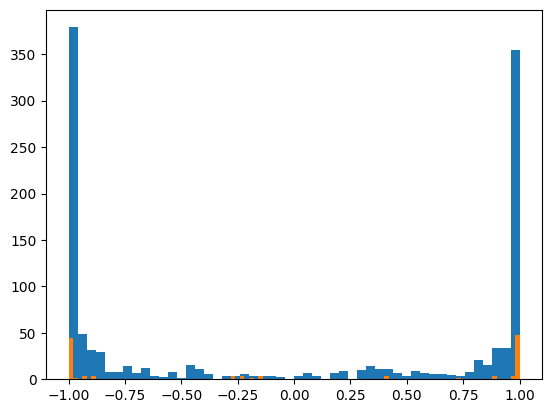

In [46]:
num_embeddings = 12
embedding_dim = 10

# Initialize the layers
emb = Embedding(num_embeddings, embedding_dim)
x = emb(Xtr[0].long())
print("1. Embedding: ", x.shape)
print(emb.weights[0])

lin = Linear(x.shape[1], 100)
x = lin(x)
print("2. Linear layer: ", x.shape)

'''batchNorm = BatchNorm1d(100)
x = batchNorm(x)
print("3. BatchNorm: ", x.shape)'''

tanh = Tanh()
x = tanh(x)
print("4. Tanh: ", x.shape)

plt.hist(x.view(-1), 50)

lin1 = Linear(100, 10)
x = lin1(x)
print("5. Linear layer: ", x.shape)

'''batchNorm1 = BatchNorm1d(10)
x = batchNorm1(x)
print("6. BatchNorm: ", x.shape)'''

tanh1 = Tanh()
x = tanh1(x)
print("7. Tanh: ", x.shape, x[:1])

plt.hist(x.view(-1), 100)

lin2 = Linear(10, 1)
x = lin2(x)
print("8a. Linear layer: ", x.shape)

transpose = Transpose()
x = transpose(x)
print("8b. Transpose layer: ", x.shape)

output = Linear(12, 10)
logits = output(x)
print("8. Output layer: ", logits.shape)

print(logits)

loss_func = nn.CrossEntropyLoss()
loss = loss_func(logits, Ytr[0].view((1)).long())
print("10. Loss: ", loss.item())

In [12]:
# Parameter initialization
n_embDim = 10
n_hidden = 100
g = torch.Generator().manual_seed(2147483647)  # for reproducibility

model = Sequential([
    Embedding(X.shape[0], n_embDim), # [32, 12, 10]
    Linear(n_embDim, n_hidden), BatchNorm1d(n_hidden), Tanh(), # [32, 12, 100]
    Linear(n_hidden, 10), BatchNorm1d(1), Tanh(), # [32, 12, 10]
    Flatten(), Linear(120, 10), BatchNorm1d(10)
])

# parameter init
#with torch.no_grad():
#    model.layers[-2].weight *= 0.1 # last layer make less confident

parameters = model.parameters()
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
    p.requires_grad = True

8482


In [34]:
# same optimization as last time
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (batch_size,))
    Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

    logits = model(Xb)

    loss = F.cross_entropy(logits, Yb.long())
    
    for p in parameters:
        p.grad = None
    loss.backward()

    # update: simple SGD
    lr = 0.1 # step learning rate decay
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    if i % 10000 == 0: # print every once in a while
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

      0/ 200000: 0.6858
  10000/ 200000: 0.9706
  20000/ 200000: 0.7587
  30000/ 200000: 0.7086
  40000/ 200000: 0.8647
  50000/ 200000: 0.7986
  60000/ 200000: 0.7912
  70000/ 200000: 0.6959
  80000/ 200000: 0.9044
  90000/ 200000: 0.8067
 100000/ 200000: 1.1784
 110000/ 200000: 0.8075
 120000/ 200000: 0.9615
 130000/ 200000: 0.9643
 140000/ 200000: 0.8503
 150000/ 200000: 0.9178
 160000/ 200000: 1.0775
 170000/ 200000: 0.6598
 180000/ 200000: 0.9779
 190000/ 200000: 0.8598


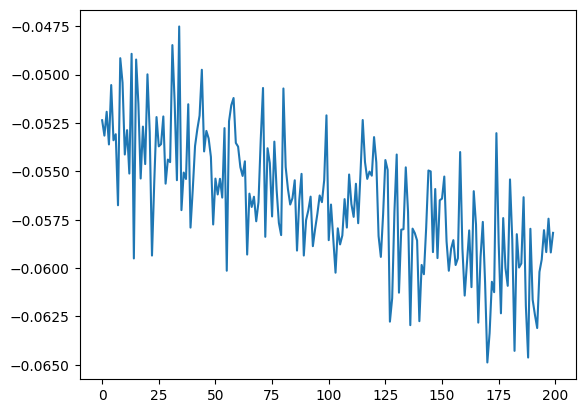

In [35]:
plt.plot(torch.tensor(lossi).view(-1, 1000).mean(1))

In [38]:
# put layers into eval mode (needed for batchnorm especially)
for layer in model.layers:
    layer.training = False

# evaluate the loss
@torch.no_grad() # this decorator disables gradient tracking inside pytorch
def split_loss(split):
    x,y = {
        'train': (Xtr, Ytr),
        'val': (Xdev, Ydev),
        'test': (Xte, Yte),
    }[split]
    logits = model(x)
    loss = F.cross_entropy(logits, y.long())
    print(split, loss.item())

split_loss('train')
split_loss('val')

train 0.883746862411499
val 10.696159362792969


In [39]:
cnt = 0
for i in range(0, len(Xte)):
    if model(Xte[i]).argmax() == Yte[i]:
        cnt += 1

print(len(Xte),'/',cnt)

51 / 11
